In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
!pip install wordcloud


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

In [ ]:
pip install pandas_profiling

In [ ]:
pip install ydata-profiling

In [ ]:
from pandas_profiling.utils.cache import cache_file
import IPython

## EDA udemy_courses

In [ ]:
url = "https://drive.google.com/file/d/1Fog4HizAySEHR6TS5COdOUie_WHjuGMz/view?usp=sharing"
url = url = "https://drive.google.com/uc?id=" + url.split('/')[-2]

udemy_course = pd.read_csv(url)

In [ ]:
udemy_course.head(5)

,course_id,is_paid_id,price,num_subscribers,num_reviews,num_lectures,level_id,content_duration,published_timestamp,subject_id,language_id,rating
0,1070968,0,200,2147,23,51,0,1.5,2017-01-18,0,0,3.6
1,1113822,0,75,2792,923,274,0,39.0,2017-03-09,0,0,4.5
2,1006314,0,45,2174,74,51,1,2.5,2016-12-19,0,0,4.2
3,1210588,0,95,2451,11,36,0,3.0,2017-05-30,0,0,4.5
4,1011058,0,200,1276,45,26,1,2.0,2016-12-13,0,0,4.8


In [ ]:
udemy_course.shape

(3672, 12)

In [ ]:
udemy_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   is_paid_id           3672 non-null   int64  
 2   price                3672 non-null   int64  
 3   num_subscribers      3672 non-null   int64  
 4   num_reviews          3672 non-null   int64  
 5   num_lectures         3672 non-null   int64  
 6   level_id             3672 non-null   int64  
 7   content_duration     3672 non-null   float64
 8   published_timestamp  3672 non-null   object 
 9   subject_id           3672 non-null   int64  
 10  language_id          3672 non-null   int64  
 11  rating               3672 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 344.4+ KB


## Deteccion de outliers

In [ ]:
url = "https://drive.google.com/file/d/1TeKzdio4pm2Rye5iTZGAJg5yBPmQYpsc/view?usp=sharing"
url = url = "https://drive.google.com/uc?id=" + url.split('/')[-2]

df_courses = pd.read_csv(url)

In [ ]:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_id     3672 non-null   int64 
 1   course_title  3672 non-null   object
dtypes: int64(1), object(1)
memory usage: 57.5+ KB


In [ ]:
df_courses.head(5)

,course_id,course_title
0,1070968,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...
2,1006314,Financial Modeling for Business Analysts and C...
3,1210588,Beginner to Pro - Financial Analysis in Excel ...
4,1011058,How To Maximize Your Profits Trading Options


In [ ]:
category_counts = df_courses['course_title'].value_counts()
print(category_counts)

Acoustic Blues Guitar Lessons                                   3
Creating an animated greeting card via Google Slides            3
Aprende a tocar el acordeón de botones                          2
Drum Lessons For Beginners                                      2
Introduction to Web Development                                 2
                                                               ..
Illustrated Logo Design                                         1
Color Basics for Print Designers                                1
Digital Photo Manipulation Art And Cover Design In PhotoShop    1
Drawing Perspective For Beginners                               1
Using MODX CMS to Build Websites: A Beginner's Guide            1
Name: course_title, Length: 3663, dtype: int64


In [ ]:
## Detecto valores anormales en la columna course_title
print(df_courses[udemy_course["course_id"]== 52118]["course_title"])


291    Multiply your returns using Value Investing
Name: course_title, dtype: object


In [ ]:
## Detecto valores anormales en la columna course_title
course_title = df_courses.loc[291, 'course_title']
print(course_title)

Multiply your returns using Value Investing


## Nueva columna - Fecha de publicacion

In [ ]:
## Creo una nueva columna y extraigo solo el año de publicación
udemy_course['year_published'] = pd.to_datetime(udemy_course['published_timestamp']).dt.year
print(udemy_course['year_published'])

0       2017
1       2017
2       2016
3       2017
4       2016
        ... 
3667    2016
3668    2017
3669    2015
3670    2016
3671    2014
Name: year_published, Length: 3672, dtype: int64


In [ ]:
udemy_course.head()

,course_id,is_paid_id,price,num_subscribers,num_reviews,num_lectures,level_id,content_duration,published_timestamp,subject_id,language_id,rating,year_published
0,1070968,0,200,2147,23,51,0,1.5,2017-01-18,0,0,3.6,2017
1,1113822,0,75,2792,923,274,0,39.0,2017-03-09,0,0,4.5,2017
2,1006314,0,45,2174,74,51,1,2.5,2016-12-19,0,0,4.2,2016
3,1210588,0,95,2451,11,36,0,3.0,2017-05-30,0,0,4.5,2017
4,1011058,0,200,1276,45,26,1,2.0,2016-12-13,0,0,4.8,2016


## Detección de valores duplicados

In [ ]:
## Deteccion de valores duplicados de la columna Id course
duplicates = udemy_course['course_id'].duplicated()
duplicated_values = udemy_course['course_id'][duplicates].unique()
duplicated_counts = udemy_course['course_id'][duplicates].value_counts()
print(duplicated_values)
print(duplicated_counts)

[]
Series([], Name: course_id, dtype: int64)


## Reset indice

In [ ]:
## Reseto el indice
udemy_course.reset_index(drop=True, inplace=True)

## Grafico de calor

<ipython-input-22-95086742cc30>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = udemy_course.corr()


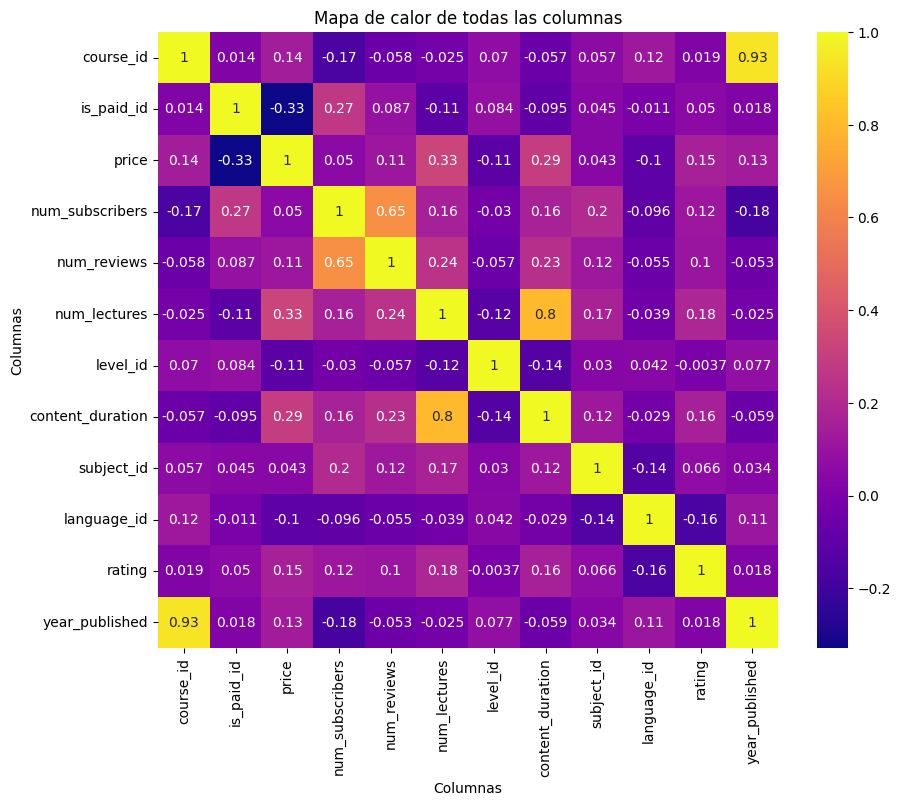

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación para todas las columnas
correlation_matrix = udemy_course.corr()

# Crear el gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')

# Añadir etiquetas y título
plt.xlabel('Columnas')
plt.ylabel('Columnas')
plt.title('Mapa de calor de todas las columnas')

# Mostrar el gráfico
plt.show()

## Nube de palabras

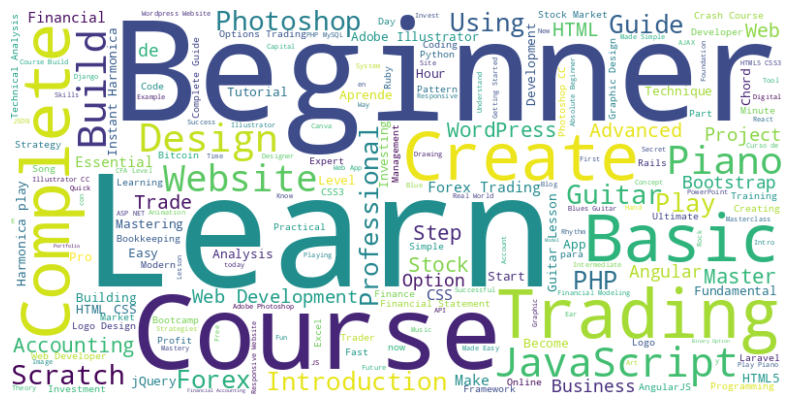

In [ ]:
titles = ' '.join(df_courses['course_title']) # Obtengo todos los títulos de los cursos en una sola cadena de texto
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles) #Creo el objeto WordCloud y genero la nube de palabras

#Muestro la nube de palabras utilizando la lib Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Observo que la nube de pabalabras, contiene "palabras" que entorpecen mi grafico. Decido eliminarlas y que muestre una tendencia mas real-

Algunas de estas palabras son
course, learn, basic, complete, create, for, with, entre otras.

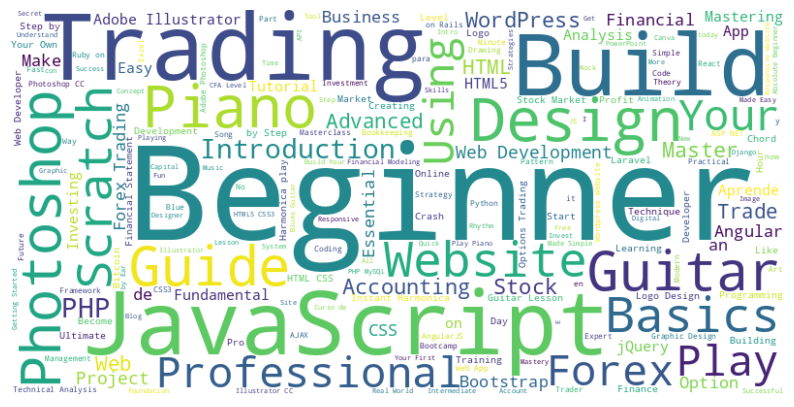

In [ ]:
## Vuelvo a ilustrar mi nube de palabras, esta vez eliminado las palabras mencionadas anteriormente

# Agrego las palabras que deseo excluir en minúsculas
stopwords = set(['course', 'learn', 'basic', 'complete', 'create', "how", "to","and","the", "with","for","a","from","of","in"])

# Convierto las palabras a minúsculas
stopwords = {word.lower() for word in stopwords}

# Creo la nube de palabras excluyendo las stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(titles)

# Muestro nuevamente la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##TOP 10 DE CURSOS SEGUN EL RATING##

In [30]:
# Ordenar udemy_courses por el rating en orden descendente
df_sorted_ratings = udemy_course.sort_values(by='rating', ascending=False)

# Obtener los IDs de los cursos con los diez mejores ratings
top_10_ids = udemy_course['course_id'].head(10).tolist()

# Filtrar df_courses utilizando los IDs del top 10
top_10_courses = df_courses[df_courses['course_id'].isin(top_10_ids)]

# Imprimir el top 10 de cursos
print("Top 10 de Cursos según el Rating:")
print(top_10_courses[['course_id', 'course_title']])

Top 10 de Cursos según el Rating:
   course_id                                       course_title
0    1070968                 Ultimate Investment Banking Course
1    1113822  Complete GST Course & Certification - Grow You...
2    1006314  Financial Modeling for Business Analysts and C...
3    1210588  Beginner to Pro - Financial Analysis in Excel ...
4    1011058       How To Maximize Your Profits Trading Options
5     192870  Trading Penny Stocks: A Guide for All Levels I...
6     739964  Investing And Trading For Beginners: Mastering...
7     403100  Trading Stock Chart Patterns For Immediate; Ex...
8     476268  Options Trading 3 : Advanced Stock Profit and ...
9    1167710  The Only Investment Strategy You Need For Your...


##TOP 10 DE CURSOS SEGUN EL NUMERO DE SUBSCRIPTORES##

In [39]:
# Ordenar udemy_courses por CANTIDAD DE SUBSCRIPTORES en orden descendente
df_sorted_subs = udemy_course.sort_values(by='num_subscribers', ascending=False)

# Obtener los IDs de los cursos con los diez mayores valores de subscriptores
top_10_ids = df_sorted_subs['course_id'].head(10).tolist()

# Filtrar df_courses utilizando los IDs del top 10
top_10_courses = df_courses[df_courses['course_id'].isin(top_10_ids)]

# Imprimir el top 10 de cursos
print("Top 10 de Cursos según el numero de subscriptores:")
print(top_10_courses[['course_id', 'course_title']])

Top 10 de Cursos según el numero de subscriptores:
      course_id                                       course_title
1891      19421              Free Beginner Electric Guitar Lessons
2583     473160  Web Design for Web Developers: Build Beautiful...
2613      94430             Learn Javascript & JQuery From Scratch
2777     173548  Build Your First Website in 1 Week with HTML5 ...
2821      41295               Learn HTML5 Programming From Scratch
3026      59014                     Coding for Entrepreneurs Basic
3224     625204                         The Web Developer Bootcamp
3226     764164              The Complete Web Developer Course 2.0
3241     364426          JavaScript: Understanding the Weird Parts
3283     130064  Practical PHP: Master the Basics and Code Dyna...


##TOP 10 DE CURSOS SEGUN CANTIDAD DE RESEÑAS##

In [37]:
# Ordenar udemy_courses por CANTIDAD DE RESEÑAS en orden descendente
df_sorted_rev = udemy_course.sort_values(by='num_reviews', ascending=False)

# Obtener los IDs de los cursos con la mayor cantidad de reseñas
top_10_ids = df_sorted_rev['course_id'].head(10).tolist()

# Filtrar df_courses utilizando los IDs del top 10
top_10_courses = df_courses[df_courses['course_id'].isin(top_10_ids)]

# Imprimir el top 10 de cursos
print("Top 10 de Cursos según el mayor numero de reseñas:")
print(top_10_courses[['course_id', 'course_title']])

Top 10 de Cursos según el mayor numero de reseñas:
      course_id                                       course_title
1974     238934  Pianoforall - Incredible New Way To Learn Pian...
2821      41295               Learn HTML5 Programming From Scratch
3198     756150  Angular 4 (formerly Angular 2) - The Complete ...
3222     719002  Angular 2 with TypeScript for Beginners: The P...
3224     625204                         The Web Developer Bootcamp
3226     764164              The Complete Web Developer Course 2.0
3240     289230                     Learn and Understand AngularJS
3241     364426          JavaScript: Understanding the Weird Parts
3245     461160                        Learn and Understand NodeJS
3248     705264                            Modern React with Redux


## ** Nuevos KPI`S a implementar **

Ingresos totales: Este KPI te permitiría visualizar el total de ingresos generados por los cursos. La fórmula para calcularlo sería: Ingresos totales = Precio curso * Num de suscriptores.

Promedio de rating: Este KPI te permitiría visualizar el promedio de rating de los cursos. La fórmula para calcularlo sería: Promedio de rating = Suma de ratings / Num de reseñas.

Duración promedio del curso: Este KPI te permitiría visualizar la duración promedio de los cursos. La fórmula para calcularlo sería: Duración promedio del curso = Duración total del curso / Num de suscriptores.